# **OFA**

In [ ]:
# clone OFA if there does not exist the repo
%cd /content
%rm -rf OFA
! git clone https://github.com/OFA-Sys/OFA.git

/content
Cloning into 'OFA'...
remote: Enumerating objects: 6219, done.
remote: Counting objects: 100% (259/259), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 6219 (delta 144), reused 168 (delta 87), pack-reused 5960
Receiving objects: 100% (6219/6219), 122.17 MiB | 16.04 MiB/s, done.
Resolving deltas: 100% (2412/2412), done.


## **Download Checkpoint**

In [ ]:
%cd /content
! mkdir -p /content/OFA/checkpoints/
! wget https://ofa-silicon.oss-us-west-1.aliyuncs.com/checkpoints/caption_large_best_clean.pt
! mv caption_large_best_clean.pt OFA/checkpoints/caption.pt

/content
--2022-09-06 13:16:59--  https://ofa-silicon.oss-us-west-1.aliyuncs.com/checkpoints/caption_large_best_clean.pt
Resolving ofa-silicon.oss-us-west-1.aliyuncs.com (ofa-silicon.oss-us-west-1.aliyuncs.com)... 47.88.111.45
Connecting to ofa-silicon.oss-us-west-1.aliyuncs.com (ofa-silicon.oss-us-west-1.aliyuncs.com)|47.88.111.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5717992325 (5.3G) [application/octet-stream]
Saving to: ‘caption_large_best_clean.pt’

caption_large_best_ 100%[===================>]   5.33G  15.5MB/s    in 6m 6s   

2022-09-06 13:23:06 (14.9 MB/s) - ‘caption_large_best_clean.pt’ saved [5717992325/5717992325]



## **Install Fairseq**

In [ ]:
# clone Fairseq for installation
%cd /content
! git clone https://github.com/pytorch/fairseq.git
%cd /content/fairseq
! pip install --use-feature=in-tree-build ./

/content
fatal: destination path 'fairseq' already exists and is not an empty directory.
/content/fairseq
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/fairseq
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 123 kB 27.0 MB/s 
     |████████████████████████████████| 235 kB 63.8 MB/s 
     |████████████████████████████████| 116 kB 60.1 MB/s 
     |████████████████████████████████| 112 kB 75.5 MB/s 
  Created wheel for fairseq: filename=fairseq-0.12.2-cp37-cp37m-linux_x86_64.whl size=15415115 sha256=fc37d1f1f188fa65a7a4dec50873b52caa5673233488687039f85ede57f68b01
  Stored in directory: /tmp/pip-ephem-wheel-cache-k5x4ryns/wheels/7c/35/80/edbd520a1a7e615df007002aeea9f6bf5f3c8f9243e072f6ce
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runti

## **Preparation**
Below you just need to import required packages, and check whether to use GPU or FP16. 

In [ ]:
%cd /content/OFA
! sed '1d' requirements.txt | xargs -I {} pip install {}

/content/OFA
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simpl

Turn on the GPU usage (tensorflow version).

In [ ]:
import tensorflow as tf
tf.__version__

gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction = 0.5)
sess = tf.compat.v1.Session(config = tf.compat.v1.ConfigProto(gpu_options = gpu_options))

'2.8.2'

Turn on the GPU usage whenever available (pyTorch version).

In [ ]:
!pip install pycuda
import torch
import pycuda.driver as cuda
cuda.init()
## Get Id of default device
torch.cuda.current_device()
# 0
cuda.Device(0).name() # '0' is the id of your GPU

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 29.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 78 kB 7.4 MB/s 
     |████████████████████████████████| 70 kB 8.0 MB/s 
  Created wheel for pycuda: filename=pycuda-2022.1-cp37-cp37m-linux_x86_64.whl size=629484 sha256=c763360cae5afb8b4cbd24c4a73c0deaf6454869196bcfeeb497266d0fce96b1
  Stored in directory: /root/.cache/pip/wheels/17/53/c9/caa05618e686df51f017d8a9923f38d915ce31df67ab6628e6
  Created wheel for pytools: filename=pytools-2022.1.12-py2.py3-none-any.whl size=65034 sha256=86bdfe245404bb489c1a12dc5e204354a3f7616b260b366d779247b66d3b9e64
  Stored in directory: /root/.cache/pip/wheels/37/5e/9e/76d7430e116b7cab0016fbabb26b896daae1946a3f7dea9915
Successfully built pycuda pytools


'Tesla T4'

In [ ]:
import torch
torch.cuda.is_available()

if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  
device = torch.device(dev)  
a = torch.zeros(4,3)    
a = a.to(device)

True

In [ ]:
import torch
import numpy as np
from fairseq import utils,tasks
from fairseq import checkpoint_utils
from utils.eval_utils import eval_step
from tasks.mm_tasks.caption import CaptionTask
from models.ofa import OFAModel
from PIL import Image

# Register caption task
tasks.register_task('caption',CaptionTask)

# turn on cuda if GPU is available
use_cuda = torch.cuda.is_available()
# use fp16 only when GPU is available
use_fp16 = True

## **Build Model**
Below you can build your model and load the weights from the given checkpoint, and also build a generator. 

In [ ]:
# Load pretrained ckpt & config
overrides={"bpe_dir":"utils/BPE", "eval_cider":False, "beam":5, "max_len_b":16, "no_repeat_ngram_size":3, "seed":7}
models, cfg, task = checkpoint_utils.load_model_ensemble_and_task(
        utils.split_paths('checkpoints/caption.pt'),
        arg_overrides=overrides
    )

# Move models to GPU
for model in models:
    model.eval()
    if use_fp16:
        model.half()
    if use_cuda and not cfg.distributed_training.pipeline_model_parallel:
        model.cuda()
    model.prepare_for_inference_(cfg)

# Initialize generator
generator = task.build_generator(models, cfg.generation)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
# jit_model = torch.jit.script(model) # runtime error
# torch.__version__
# torch.jit.save(jit_model, 'OFA_jit.pt')
# type(jit_model)

## **Preprocess**
For preprocessing inputs.

In [ ]:
# Image transform
from torchvision import transforms
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

patch_resize_transform = transforms.Compose([
    lambda image: image.convert("RGB"),
    transforms.Resize((cfg.task.patch_image_size, cfg.task.patch_image_size), interpolation=Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

# Text preprocess
bos_item = torch.LongTensor([task.src_dict.bos()])
eos_item = torch.LongTensor([task.src_dict.eos()])
pad_idx = task.src_dict.pad()
def encode_text(text, length=None, append_bos=False, append_eos=False):
    s = task.tgt_dict.encode_line(
        line=task.bpe.encode(text),
        add_if_not_exist=False,
        append_eos=False
    ).long()
    if length is not None:
        s = s[:length]
    if append_bos:
        s = torch.cat([bos_item, s])
    if append_eos:
        s = torch.cat([s, eos_item])
    return s

# Construct input for caption task
def construct_sample(image: Image):
    patch_image = patch_resize_transform(image).unsqueeze(0)
    patch_mask = torch.tensor([True])
    src_text = encode_text(" what does the image describe?", append_bos=True, append_eos=True).unsqueeze(0)
    src_length = torch.LongTensor([s.ne(pad_idx).long().sum() for s in src_text])
    sample = {
        "id":np.array(['42']),
        "net_input": {
            "src_tokens": src_text,
            "src_lengths": src_length,
            "patch_images": patch_image,
            "patch_masks": patch_mask
        }
    }
    return sample
  
# Function to turn FP32 to FP16
def apply_half(t):
    if t.dtype is torch.float32:
        return t.to(dtype=torch.half)
    return t

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:333: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "


## **Run Inference**
Download an image and run the following scripts to generate the caption.

In [ ]:
# Download an image from COCO or you can use other images with wget
#! wget http://farm4.staticflickr.com/3539/3836680545_2ccb331621_z.jpg 
#! mv 3836680545_2ccb331621_z.jpg  test.jpg

# Not a COCO image but anything is okay
! wget https://www.cleverfiles.com/howto/wp-content/uploads/2018/03/minion.jpg
! mv minion.jpg  test.jpg 

image = Image.open('./test.jpg')

# Construct input sample & preprocess for GPU if cuda available
sample = construct_sample(image)
sample = utils.move_to_cuda(sample) if use_cuda else sample
sample = utils.apply_to_sample(apply_half, sample) if use_fp16 else sample

--2022-09-06 13:35:00--  https://www.cleverfiles.com/howto/wp-content/uploads/2018/03/minion.jpg
Resolving www.cleverfiles.com (www.cleverfiles.com)... 67.225.176.50
Connecting to www.cleverfiles.com (www.cleverfiles.com)|67.225.176.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29833 (29K) [image/jpeg]
Saving to: ‘minion.jpg’

minion.jpg          100%[===================>]  29.13K   129KB/s    in 0.2s    

2022-09-06 13:35:02 (129 KB/s) - ‘minion.jpg’ saved [29833/29833]



In [ ]:
# Run eval step for caption
with torch.no_grad():
    result, scores = eval_step(task, generator, models, sample)

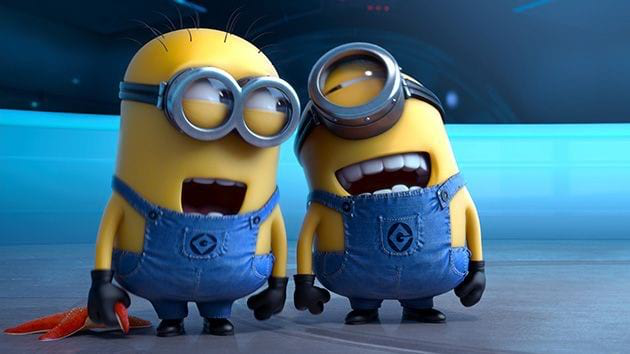

Caption: two despicable me minions dressed in jeans and glasses


In [ ]:
display(image)
print('Caption: {}'.format(result[0]['caption']))